# Figures for the publication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## read all the results data

In [2]:
all_records_list = []

all_records_list.append(pd.read_pickle('/Volumes/MSSHARE/Joonyong/DeepNovoRun/mgf_test/all_results_df.pkl'))
all_records_list.append(pd.read_pickle('/Volumes/MSSHARE/Joonyong/Novor_Results_KAIKO/all_results_from_novor.pkl'))
all_records_list.append(pd.read_pickle('/Volumes/MSSHARE/Joonyong/PEAKS_Results_KAIKO/all_results_from_peaks.pkl'))
all_records_list.append(pd.read_pickle('/Volumes/MSSHARE/Joonyong/PnnlRun3_235_v4_0001_ep_60/mgf_test/all_results_df.pkl'))

In [3]:
data_labels = ['DeepNovo', "Novor", "PEAKS", "Kaiko"]

## Figure 2. Peptide recall of 4 algorithms

In [4]:
dfs = []
for i, r in enumerate(all_records_list):
    df = pd.DataFrame(r.groupby(by="file_id").exact_match.agg(['mean']))
    df['file_id'] = df.index
    df['Method'] = data_labels[i]
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df['mean'] = df['mean']*100
df.head()

,mean,file_id,Method
0,22.186515,235,DeepNovo
1,21.469947,236,DeepNovo
2,22.435816,237,DeepNovo
3,14.820402,238,DeepNovo
4,17.357179,239,DeepNovo


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


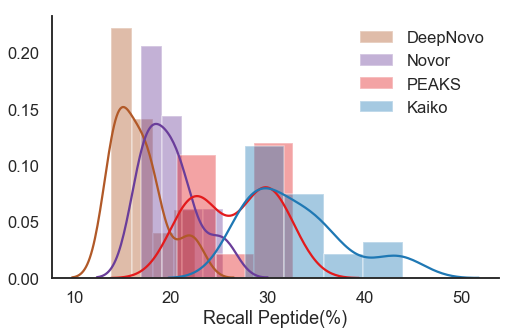

In [13]:
NUM_COLORS = 12

cm = plt.get_cmap('Paired')
colors = [cm(1.*(NUM_COLORS-4*i+1)/NUM_COLORS) for i in range(NUM_COLORS)]

sns.set(style="white", context="talk")
# g = sns.FacetGrid(df, hue="Method", height=5, aspect=1.5, legend_out=False, palette=colors, hue_order=['Kaiko','PEAKS','Novor','DeepNovo'])
g = sns.FacetGrid(df, hue="Method", height=5, aspect=1.5, legend_out=False, palette=colors, hue_order=['DeepNovo', 'Novor', 'PEAKS', 'Kaiko'])
g = (g.map(sns.distplot, "mean").add_legend())

g.set(xlabel="Recall Peptide(%)")
plt.legend(frameon=False)
g.savefig("fig2.acc_histo_by_datasize.png", dpi=600)
plt.show()

## Figure 3. Accuracy by len of 4 algorithms

In [244]:
dfs = []
for i, record in enumerate(all_records_list):
    df = record[(record.file_id > 234)&(record.len_AA<21)].copy()
    df = pd.DataFrame(df.groupby(by="len_AA").exact_match.agg(['mean']))
    df['len_AA'] = df.index
    df['Method'] = data_labels[i]
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df['mean'] = df['mean']*100
df.head()

,mean,len_AA,Method
0,85.132275,6,DeepNovo
1,75.162866,7,DeepNovo
2,63.718941,8,DeepNovo
3,50.255039,9,DeepNovo
4,37.876645,10,DeepNovo


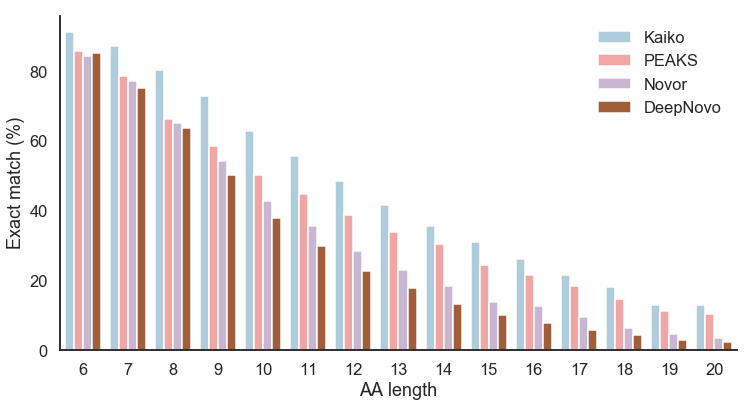

In [248]:
plt.close("all")

# cm = plt.get_cmap('Paired')
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_color_cycle([cm(1.*(4*i)/NUM_COLORS) for i in range(NUM_COLORS)])

g = sns.catplot(x="len_AA", y="mean", hue="Method", kind="bar", palette=colors, 
                hue_order=['Kaiko','PEAKS','Novor','DeepNovo'],
                data=df, height=6, aspect=1.8, legend_out=False)

g.set(xlabel="AA length")
g.set(ylabel="Exact match (%)")
plt.legend(frameon=False)
g.savefig("fig3.acc_by_len.png", dpi=600)
plt.show()

## Figure 4 - longest matching substrings of len 9,12,15,17 of 4 algorithms

In [256]:
longet_matches = []
for i, r in enumerate(all_records_list):
    temp_df = r[['longest_match','len_AA']].copy()
    temp_df['Method'] = data_labels[i]
    longet_matches.append(temp_df)
    
df = pd.concat(longet_matches, ignore_index=True)
df.head()

,longest_match,len_AA,Method
0,3,10,DeepNovo
1,8,8,DeepNovo
2,1,10,DeepNovo
3,4,9,DeepNovo
4,4,10,DeepNovo


In [46]:
# split files
def plot_longest_match_with_cumsum(df, len_AA):
    plt.close('all')
    tot, _ = df[(df.len_AA==len_AA)&(df.Method=="PEAKS")].shape
    ttf = df[df.len_AA==len_AA].groupby(by=["Method",'longest_match']).len_AA.agg('count').unstack(level=-1)
    ttf = ttf[ttf.columns[::-1]]
    ttfc = ttf.cumsum(axis=1)
    # print(ttf)
    ttfc.columns = ttfc.columns[::-1]
    # print(ttfc)
    ttfc = 100.0*ttfc/tot

    fig, ax = plt.subplots(figsize=(10,6))

    ttf.transpose()[['Kaiko','PEAKS','Novor','DeepNovo']].plot(kind='bar', ax=ax, legend=True, colormap=plt.get_cmap("Paired"))
    ttfc.transpose()[['Kaiko','PEAKS','Novor','DeepNovo']].plot(kind='line', secondary_y=True, style='.:', linewidth=2, ax=ax, legend=True, colormap=plt.get_cmap("Paired"))

    ax.set_xlabel("Longest match length (len={0})".format(len_AA), fontsize=15)
    ax.set_ylabel('Counts (bars)', fontsize=15)
    ax.right_ax.set_ylabel('Cumulative percentage % (lines)', fontsize=15)
    ax.legend(loc='center right', frameon=False)
    plt.savefig("fig4.longest_match_{0}.png".format(len_AA), dpi=600)
#     plt.show()
# plot_longest_match_with_cumsum(df, 8)

for i in [9,12,15,17]:
    plot_longest_match_with_cumsum(df, i)

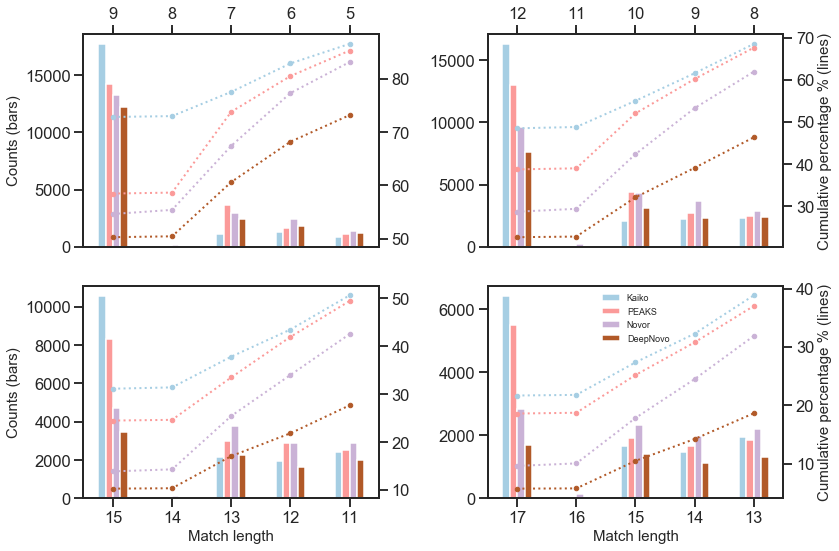

In [260]:
# draw all in one figure
plt.close('all')

def plot_longest_match_with_cumsum(df, len_AA, ax, legend=False):
    tot, _ = df[(df.len_AA==len_AA)&(df.Method=="PEAKS")].shape
    ttf = df[df.len_AA==len_AA].groupby(by=["Method",'longest_match']).len_AA.agg('count').unstack(level=-1)
    ttf = ttf[ttf.columns[::-1]]
    ttfc = ttf.cumsum(axis=1)
    ttfc.columns = ttfc.columns[::-1]
    ttfc = 100.0*ttfc/tot
    ttf.iloc[:,0:5].transpose()[['Kaiko','PEAKS','Novor','DeepNovo']].plot(kind='bar', ax=ax, legend=False, colormap=plt.get_cmap("Paired"))
    ttfc.iloc[:,0:5].transpose()[['Kaiko','PEAKS','Novor','DeepNovo']].plot(kind='line', secondary_y=True, style='.:', linewidth=2, ax=ax, legend=False, colormap=plt.get_cmap("Paired"))
#     ax.set_title("Longest match length (len={0})".format(len_AA), fontsize=15)
    if legend: ax.legend(loc='upper center', frameon=False,fontsize=9)

fig, ax = plt.subplots(2, 2, figsize=(12,8),sharex=False, sharey=False)

plot_longest_match_with_cumsum(df, 9, ax[0,0])
plot_longest_match_with_cumsum(df, 12, ax[0,1])
plot_longest_match_with_cumsum(df, 15, ax[1,0])
plot_longest_match_with_cumsum(df, 17, ax[1,1], True)

ax[1,0].set_xlabel("Match length", fontsize=15)
ax[1,1].set_xlabel("Match length", fontsize=15)
ax[0,0].set_ylabel("Counts (bars)", fontsize=15)
ax[1,0].set_ylabel("Counts (bars)", fontsize=15)
ax[0,1].right_ax.set_ylabel('Cumulative percentage % (lines)', fontsize=15)
ax[1,1].right_ax.set_ylabel('Cumulative percentage % (lines)', fontsize=15)

# Position x tick labels on top
ax[0,0].xaxis.set_ticks_position("top")
ax[0,1].xaxis.set_ticks_position("top")
ax[1,0].xaxis.set_ticks_position("bottom")
ax[1,1].xaxis.set_ticks_position("bottom")

plt.tight_layout()
plt.savefig("fig4.longest_match_all.png", dpi=600)
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:41: MatplotlibDepr

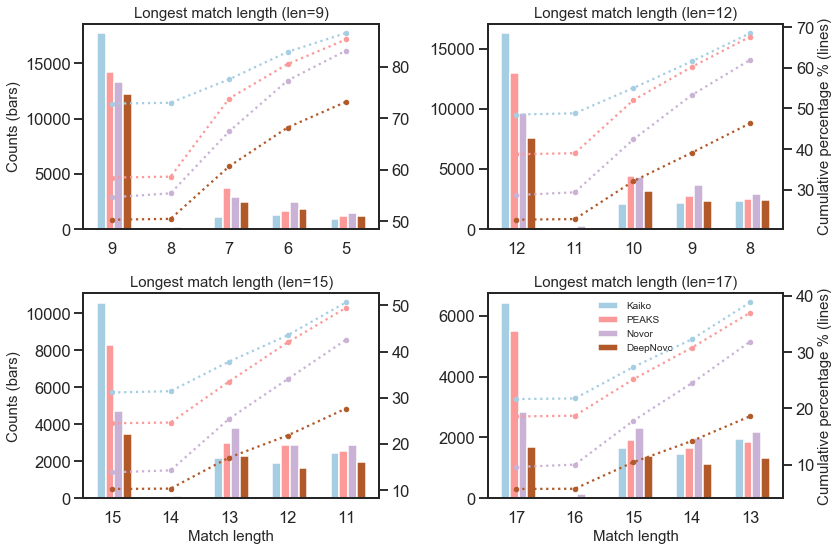

In [259]:
# draw all in one figure
plt.close('all')

def plot_longest_match_with_cumsum(df, len_AA, ax, second_y_label=False, legend=False):
    cm = plt.get_cmap('Paired')
    ax.set_color_cycle([cm(1.*(4*i)/NUM_COLORS) for i in range(NUM_COLORS)])

    tot, _ = df[(df.len_AA==len_AA)&(df.Method=="PEAKS")].shape
    ttf = df[df.len_AA==len_AA].groupby(by=["Method",'longest_match']).len_AA.agg('count').unstack(level=-1)
    ttf.to_csv("Longest match length (len={0}).csv".format(len_AA))
    
    ttf = ttf[ttf.columns[::-1]]
    ttfc = ttf.cumsum(axis=1)
    ttfc.columns = ttfc.columns[::-1]
    ttfc = 100.0*ttfc/tot
    
    n_leng = 5
    methods = ['Kaiko','PEAKS','Novor','DeepNovo']
    
    mttf = ttf.iloc[:,0:n_leng].transpose()
    mttf['long_match'] = mttf.index
    mttfc = ttfc.iloc[:,0:n_leng].transpose()
    mttfc['long_match'] = mttf.index
    bar = pd.melt(mttf, id_vars=['long_match'], value_vars=methods)
    line = pd.melt(mttfc, id_vars=['long_match'], value_vars=methods)
    
    index = np.arange(n_leng)
    bar_width = 0.15
    
    for i,m in enumerate(methods):
        bd = bar[bar.Method==m]
        ax.bar(index+bar_width*i, bd.value, bar_width, label=m)
        if i==0: xticklabels = bd.long_match
        
    ax.set_xticks(index + 5*bar_width / len(methods))
    ax.set_xticklabels(xticklabels)
    ax.set_title("Longest match length (len={0})".format(len_AA), fontsize=15)
    if legend: ax.legend(loc='upper center', frameon=False,fontsize=10)
        
    ax2 = ax.twinx()
    ax2.set_color_cycle([cm(1.*(4*i)/NUM_COLORS) for i in range(NUM_COLORS)])
    for i,m in enumerate(methods):
        ld = line[line.Method==m]
        ax2.plot(index + 5*bar_width / len(methods), ld.value, '.:')
    if second_y_label: ax2.set_ylabel('Cumulative percentage % (lines)', fontsize=15)
    
    return

NUM_COLORS = 12
fig, ax = plt.subplots(2, 2, figsize=(12,8),sharex=False, sharey=False)

plot_longest_match_with_cumsum(df, 9, ax[0,0])
plot_longest_match_with_cumsum(df, 12, ax[0,1], second_y_label=True)
plot_longest_match_with_cumsum(df, 15, ax[1,0])
plot_longest_match_with_cumsum(df, 17, ax[1,1], second_y_label=True, legend=True)

ax[1,0].set_xlabel("Match length", fontsize=15)
ax[1,1].set_xlabel("Match length", fontsize=15)
ax[0,0].set_ylabel("Counts (bars)", fontsize=15)
ax[1,0].set_ylabel("Counts (bars)", fontsize=15)

plt.tight_layout()
plt.savefig("fig4.longest_match_all.png", dpi=600)
plt.show()